## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ['val_loss','val_acc']
PATIENCE = [5, 10, 25]

In [8]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
import itertools
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for monitor, patience in itertools.product(MONITOR, PATIENCE):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with monitor = %s, patience = %s" % (monitor, str(patience)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    earlystop = EarlyStopping(monitor=monitor, 
                          patience=patience, 
                          verbose=1
                          )
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "m-%s-p-%s" % (monitor, str(patience))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with monitor = val_loss, patience = 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batc

50000/50000 [==============================] - 3s 61us/step - loss: 0.8816 - acc: 0.7066 - val_loss: 1.4640 - val_acc: 0.4956
Epoch 30/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.8612 - acc: 0.7169 - val_loss: 1.4620 - val_acc: 0.4944
Epoch 31/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.8428 - acc: 0.7238 - val_loss: 1.4635 - val_acc: 0.5006
Epoch 32/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.8224 - acc: 0.7314 - val_loss: 1.4651 - val_acc: 0.5034
Epoch 33/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.8029 - acc: 0.7400 - val_loss: 1.4650 - val_acc: 0.5005
Epoch 34/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.7834 - acc: 0.7471 - val_loss: 1.4735 - val_acc: 0.5044
Epoch 35/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.7668 - acc: 0.7541 - val_loss: 1.4848 - val_acc: 0.4980
Epoch 36/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.2342 - acc: 0.2622 - val_loss: 2.1475 - val_acc: 0.3266
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7529 - acc: 0.3927 - val_loss: 1.8452 - val_acc: 0.3834
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6273 - acc: 0.4332 - val_loss: 1.7377 - val_acc: 0.4021
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5502 - acc: 0.4584 - val_loss: 1.6462 - val_acc: 0.4236
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4939 - acc: 0.4800 - val_loss: 1.6064 - val_acc: 0.4358
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4463 - acc: 0.4947 - val_loss: 1.5757 - val_acc: 0.4420
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4067 - acc: 0.5099 - val_loss: 1.5506 - val_acc

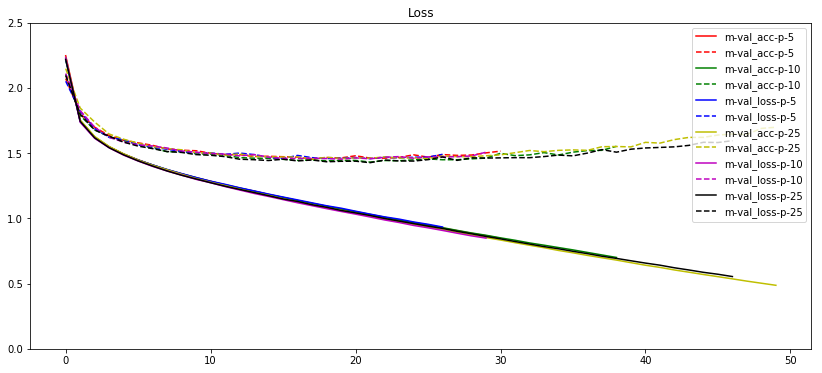

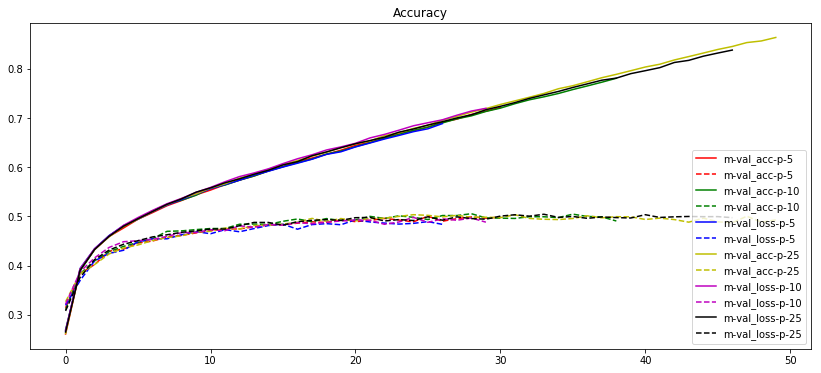

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "orangered", "purple"]

plt.figure(figsize=(14,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'],
             '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'],
             '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'],
             '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'],
             '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()